In [ ]:
# ベイズ推論による機械学習　2章　基本的な確率分布 #

In [1]:
using Random, Distributions, PyPlot
Random.seed!(123);

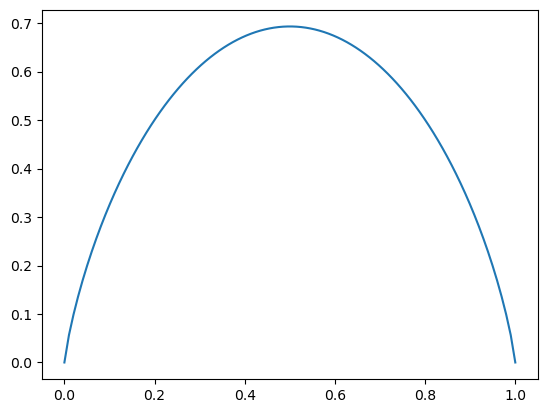

In [25]:
# Entropy of Bernoulli distribution
N = 100
H = zeros(N)
for (i, μ) in enumerate(range(0, 1, length=N))
    H[i] = entropy(Bernoulli(μ))
end

plot(range(0, 1, length=N), H);

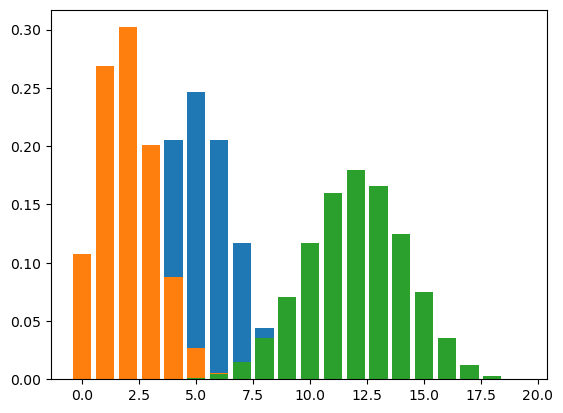

In [26]:
# Binomial distribution
𝐱 = range(0, step=1, length=20)

𝒑1 = pdf(Binomial(10, 0.5), 𝐱)
𝒑2 = pdf(Binomial(10, 0.2), 𝐱)
𝒑3 = pdf(Binomial(20, 0.6), 𝐱)

bar(𝐱, 𝒑1); bar(𝐱, 𝒑2); bar(𝐱, 𝒑3);

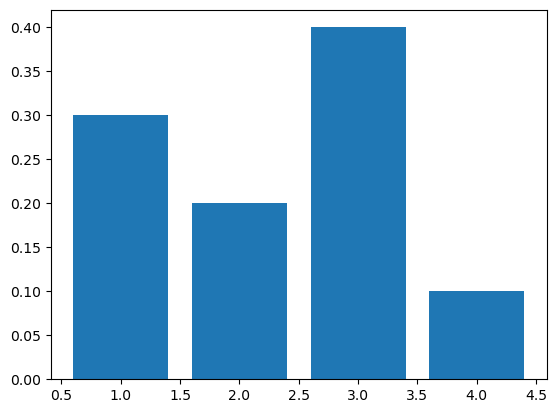

In [27]:
# Categorical distribution
𝛑 = [0.3,0.2,0.4,0.1]
𝐱 = range(1, step=1, length=4)
𝒑 = pdf(Categorical(𝛑), 𝐱)
bar(𝐱, 𝒑);

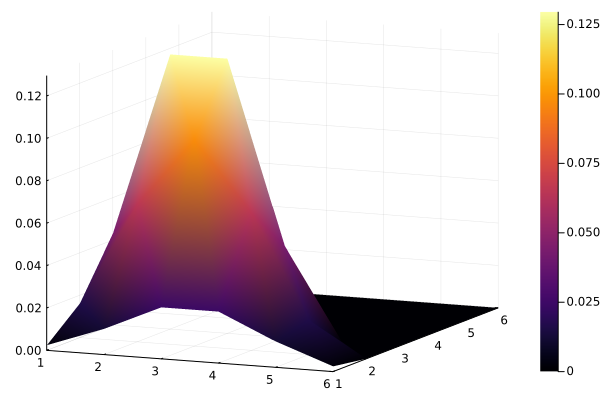

In [28]:
# Multinomial distribution
M = 5
𝛑 = [0.4, 0.3, 0.3]

multi = zeros(M+1, M+1)
for m₁ in 0:M
    for m₂ in 0:(M-m₁)
        m₃ = M - (m₁+m₂)
        if m₃ >= 0
            𝒑 = pdf(Multinomial(M, 𝛑),[m₁, m₂, m₃])
            multi[m₁+1, m₂+1] = 𝒑
        end
    end
end

using Plots;
surface(multi)

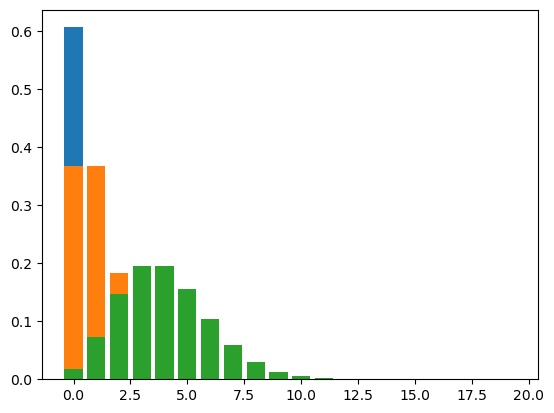

In [29]:
# Poisson distribution
𝐱 = range(0, step=1, length=20)

𝒑1 = pdf(Poisson(0.5), 𝐱)
𝒑2 = pdf(Poisson(1.0), 𝐱)
𝒑3 = pdf(Poisson(4.0), 𝐱)

bar(𝐱, 𝒑1); bar(𝐱, 𝒑2); bar(𝐱, 𝒑3);

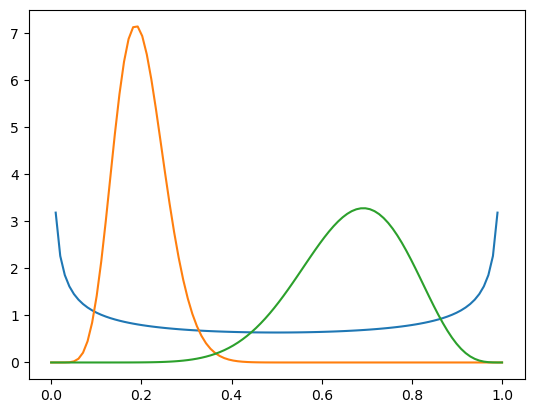

In [30]:
# Beta distribution
μ = range(0, 1, length=100)

𝒑1 = pdf(Beta(0.5, 0.5), μ)
𝒑2 = pdf(Beta(10.0, 40.0), μ)
𝒑3 = pdf(Beta(10.0, 5.0), μ)

plot(μ, 𝒑1); plot(μ, 𝒑2); plot(μ, 𝒑3);

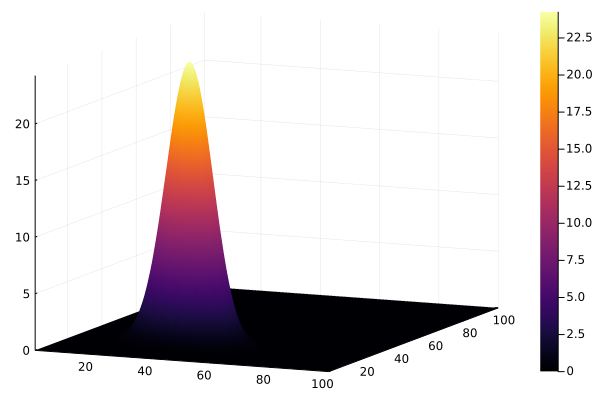

In [31]:
# Dirichlet distribution
𝛑₁ = range(0, 1, length=100)
𝛑₂ = range(0, 1, length=100)

diri = zeros(100, 100)
for (i, π₁) in enumerate(𝛑₁)
    for (j, π₂) in enumerate(𝛑₂)
        π₃ = 1 - (π₁+π₂)
        if π₃ >= 0
            𝒑 = pdf(Dirichlet([10.0, 10.0, 10.0]), [π₁, π₂, π₃])
            diri[i, j] = 𝒑
        end
    end
end

surface(diri)

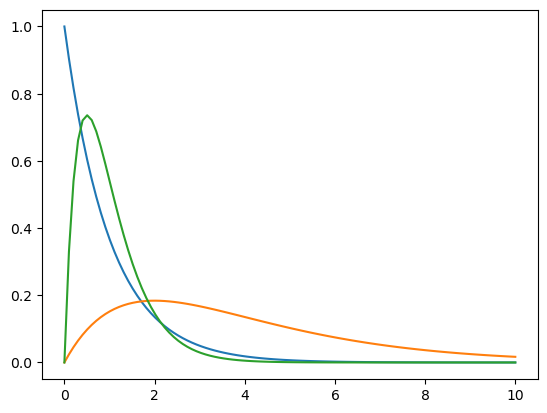

In [32]:
# Gamma distribution
λ = range(0, 10, length=100)

𝒑1 = pdf(Gamma(1.0, 1.0), λ)
𝒑2 = pdf(Gamma(2.0, 2.0), λ)
𝒑3 = pdf(Gamma(2.0, 0.5), λ)

plot(λ, 𝒑1); plot(λ, 𝒑2); plot(λ, 𝒑3);

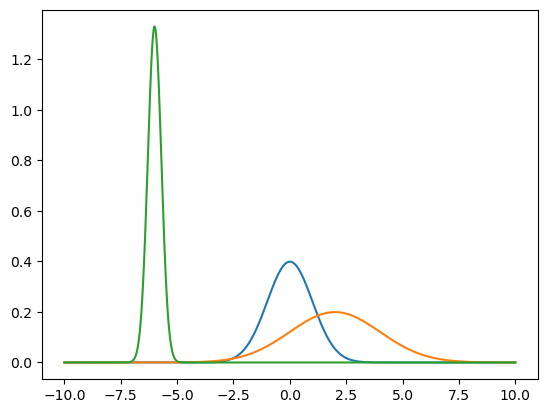

2.8068528194400546

In [33]:
# Gaussian distribution
𝐱 = range(-10, 10, length=1000)

𝒑1 = pdf(Normal(0.0, 1.0), 𝐱)
𝒑2 = pdf(Normal(2.0, 2.0), 𝐱)
𝒑3 = pdf(Normal(-6.0, 0.3), 𝐱)

plot(𝐱, 𝒑1); plot(𝐱, 𝒑2); plot(𝐱, 𝒑3);

# KL divergence
KL(μ₁, μ₂, σ₁, σ₂) = 0.5*(((μ₁-μ₂)^2+σ₂^2)/σ₁^2+log(σ₁^2/σ₂^2)-1)
kl_norm = KL(0.0, 2.0, 1.0, 2.0) # KL(p2||p1)

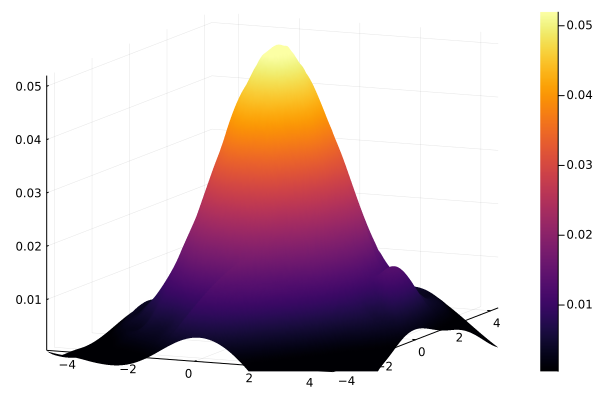

In [24]:
# Multivariate  Gaussian distribution
𝛍 = Float64[0,0]

𝚺 = Float64[
    3 0
    0 3
]

𝐱 = rand(MvNormal(𝛍, 𝚺), 100)
𝒑 = pdf(MvNormal(𝛍, 𝚺), 𝐱)
surface(𝐱[1,:], 𝐱[2,:], 𝒑)

In [43]:
# Wishart distribution
using LinearAlgebra
ν= 5.0
W =  Matrix{Float64}(2.0I, 2, 2)
𝚲 = rand(Wishart(ν, W), 5)




LoadError: [91mMethodError: no method matching inv(::Array{Array{Float64,2},1})[39m
[91m[0mClosest candidates are:[39m
[91m[0m  inv([91m::BigFloat[39m) at mpfr.jl:464[39m
[91m[0m  inv([91m::Missing[39m) at missing.jl:100[39m
[91m[0m  inv([91m::Complex{Float64}[39m) at complex.jl:439[39m
[91m[0m  ...[39m